<a href="https://colab.research.google.com/github/alihashemi8/romanian_map_paths/blob/main/romanian_map_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product


In [ ]:
G = nx.Graph()
edges = [
    ('Arad', 'Zerind', 75),
    ('Arad', 'Sibiu', 140),
    ('Arad', 'Timisoara', 118),
    ('Zerind', 'Oradea', 71),
    ('Oradea', 'Sibiu', 151),
    ('Sibiu', 'Fagaras', 99),
    ('Sibiu', 'Rimnicu Vilcea', 80),
    ('Fagaras', 'Bucharest', 211),
    ('Rimnicu Vilcea', 'Craiova', 146),
    ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Craiova', 'Drobeta', 120),
    ('Drobeta', 'Mehadia', 75),
    ('Mehadia', 'Lugoj', 70),
    ('Lugoj', 'Timisoara', 111),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urziceni', 85),
    ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86),
    ('Urziceni', 'Vaslui', 142),
    ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87)
]

for u, v, w in edges:
    G.add_edge(u, v, weight=w)


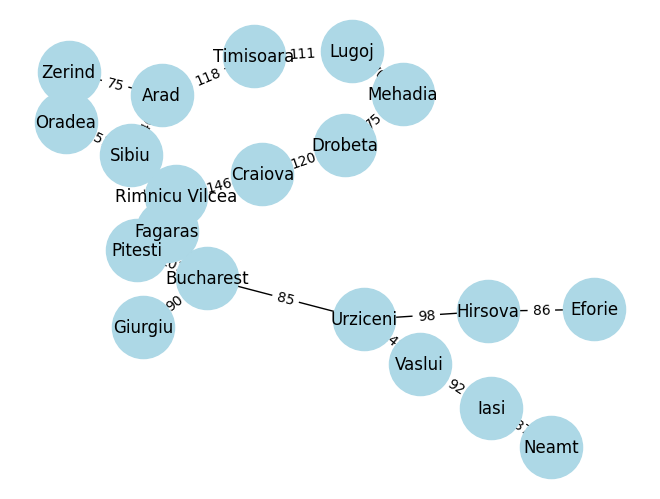

In [ ]:
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
all_paths = list(nx.all_simple_paths(G, source='Arad', target='Bucharest'))

path_costs = []
for path in all_paths:
    cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
    path_costs.append((path, cost))

path_costs.sort(key=lambda x: x[1])


In [ ]:
# m
m = max(len(path)-1 for path in all_paths)
print("Maximum depth (m):", m)

# b
branching_counts = [len(list(G.neighbors(node))) for node in G.nodes()]
b = sum(branching_counts)/len(branching_counts)
print("Average branching factor (b):", b)


Maximum depth (m): 9
Average branching factor (b): 2.2


In [ ]:
print("All paths from Arad to Bucharest with their costs:")
for path, cost in path_costs:
    print(f"Path: {' -> '.join(path)}, Cost: {cost}")


All paths from Arad to Bucharest with their costs:
Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 418
Path: Arad -> Sibiu -> Fagaras -> Bucharest, Cost: 450
Path: Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 575
Path: Arad -> Zerind -> Oradea -> Sibiu -> Fagaras -> Bucharest, Cost: 607
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 838
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Sibiu -> Fagaras -> Bucharest, Cost: 1030


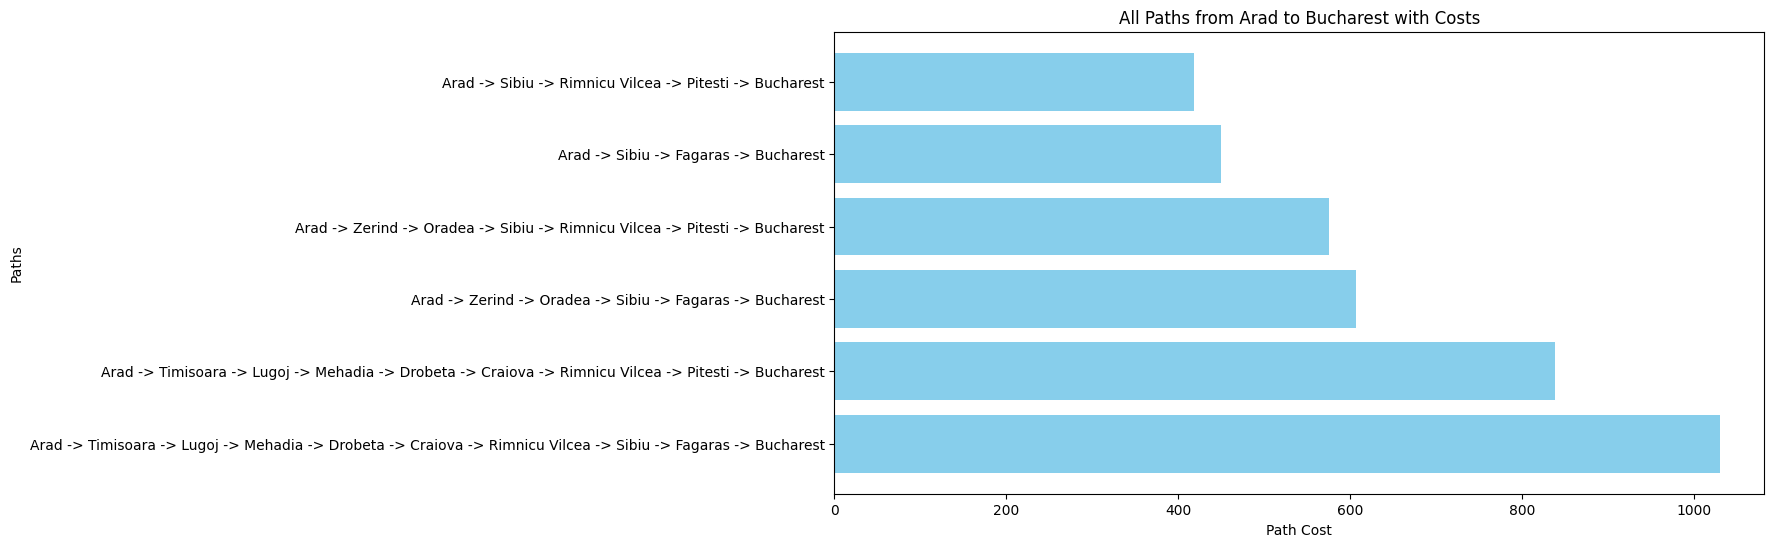

In [ ]:
paths_labels = [' -> '.join(p[0]) for p in path_costs]
costs = [p[1] for p in path_costs]

plt.figure(figsize=(12,6))
plt.barh(paths_labels, costs, color='skyblue')
plt.xlabel("Path Cost")
plt.ylabel("Paths")
plt.title("All Paths from Arad to Bucharest with Costs")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
optimal_path, optimal_cost = path_costs[0]
print("Optimal path:", " -> ".join(optimal_path))
print("Optimal path cost (d):", optimal_cost)


Optimal path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Optimal path cost (d): 418


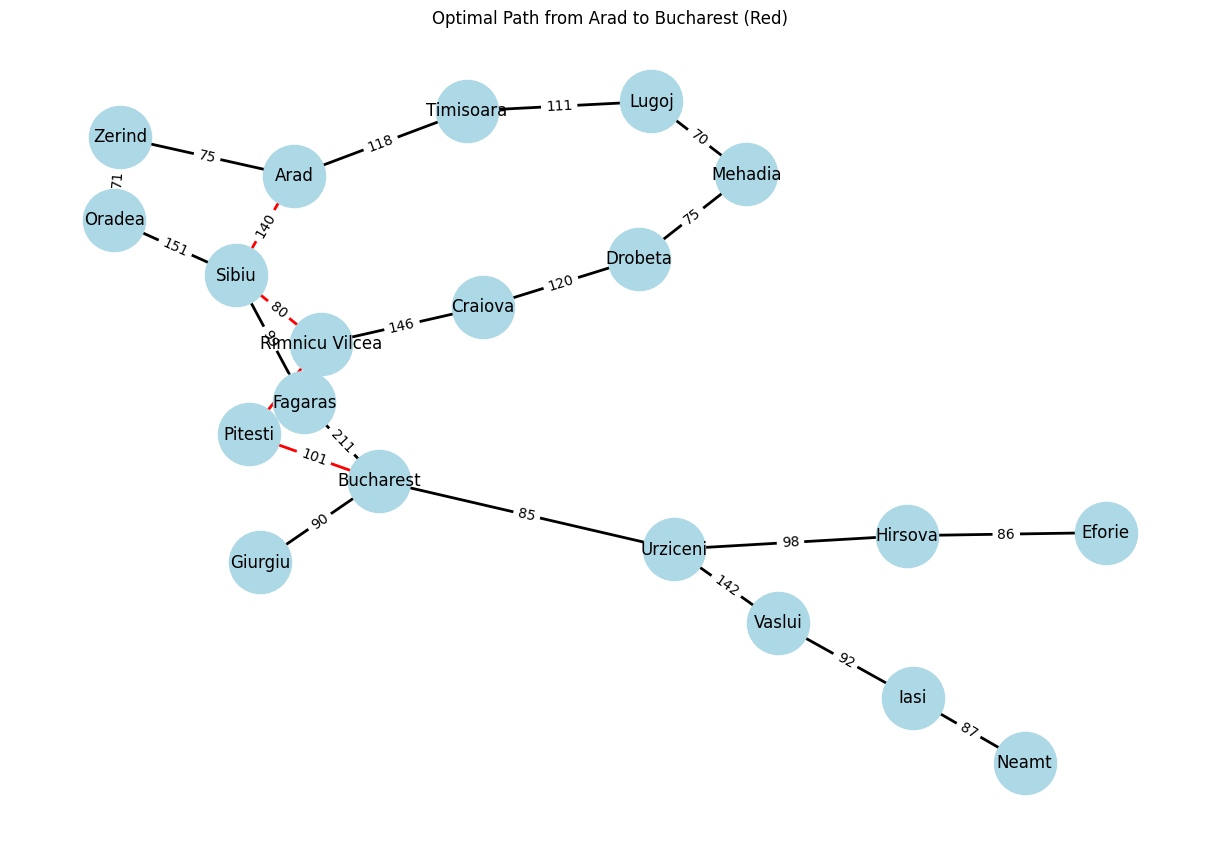

In [ ]:
edge_colors = ['red' if (u,v) in zip(optimal_path, optimal_path[1:]) or (v,u) in zip(optimal_path, optimal_path[1:]) else 'black' for u,v in G.edges()]

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Optimal Path from Arad to Bucharest (Red)")
plt.show()
